In [1]:
import pandas as pd
import numpy as np
import os

vdjdb= pd.read_csv('/Users/shalomifernandes/Desktop/UOB/TB2/DSMP/vdjdb.csv')

In [2]:
vdjdb

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


In [28]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'antigen.epitope' is the name of the categorical column
column_to_encode = 'antigen.epitope'

# Create a DataFrame for demonstration
data = {'antigen.epitope': ['A', 'B', 'A', 'C']}
data = pd.DataFrame(vdjdb)

# One-Hot Encoding with the new parameter name
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' is used to handle multicollinearity
onehot_encoded = onehot_encoder.fit_transform(vdjdb[[column_to_encode]])
data = pd.concat([vdjdb, pd.DataFrame(onehot_encoded, columns=[f'{column_to_encode}_{int(i)}' for i in range(onehot_encoded.shape[1])])], axis=1)


In [29]:
data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.epitope_1158,antigen.epitope_1159,antigen.epitope_1160,antigen.epitope_1161,antigen.epitope_1162,antigen.epitope_1163,antigen.epitope_1164,antigen.epitope_1165,antigen.epitope_1166,antigen.epitope_1167
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'column_to_encode' is the name of the categorical column
column_to_encode = 'antigen.epitope'

# Create a DataFrame for demonstration
data = {'antigen.epitope': ['A', 'B', 'A', 'C']}
data = pd.DataFrame(data)

# Label Encoding
label_encoder = LabelEncoder()
data[column_to_encode + '_encoded'] = label_encoder.fit_transform(data[column_to_encode])


In [22]:
data

,antigen.epitope,antigen.epitope_encoded
0,A,0
1,B,1
2,A,0
3,C,2


In [24]:
print(data.columns)

Index(['antigen.epitope', 'antigen.epitope_encoded'], dtype='object')


In [3]:
print(vdjdb.columns)

Index(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a',
       'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'],
      dtype='object')


#Bar Graph to visualize Gene distribution

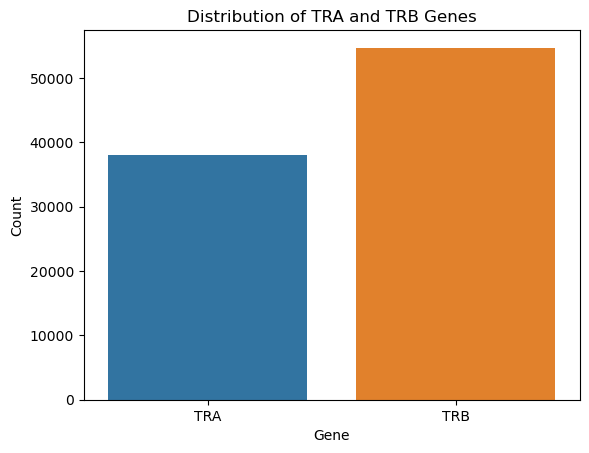

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gene distribution
sns.countplot(x='gene', data=vdjdb)
plt.title('Distribution of TRA and TRB Genes')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.show()

#Pie Chart to visualize MHC Class Distribution

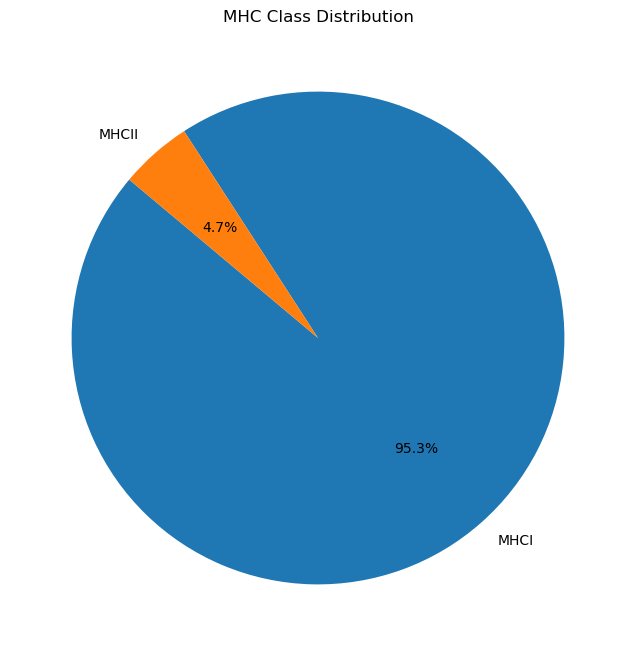

In [5]:
# MHC class distribution
%matplotlib inline
mhc_class_counts = vdjdb['mhc.class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mhc_class_counts, labels=mhc_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('MHC Class Distribution')
plt.show()

#Heatmap to show V and J Gene Usage

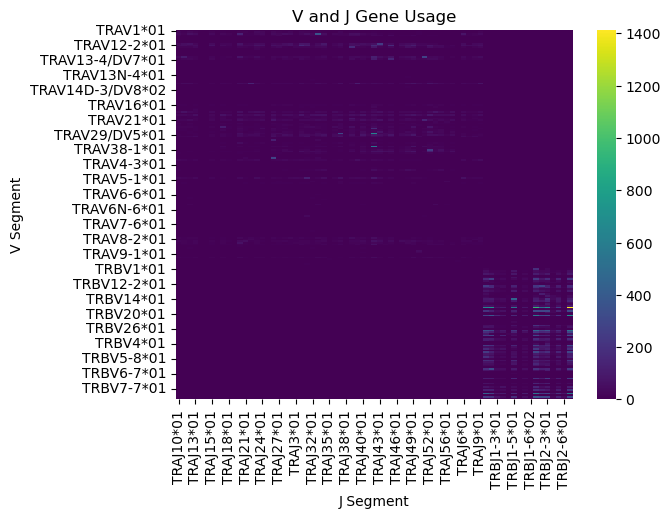

In [6]:
# Heatmap of V and J gene usage
vj_usage = pd.crosstab(vdjdb['v.segm'], vdjdb['j.segm'])
sns.heatmap(vj_usage, cmap='viridis')
plt.title('V and J Gene Usage')
plt.xlabel('J Segment')
plt.ylabel('V Segment')
plt.show()

#Network Graph to show Association Between TCR Sequences and Antigen Epitopes 

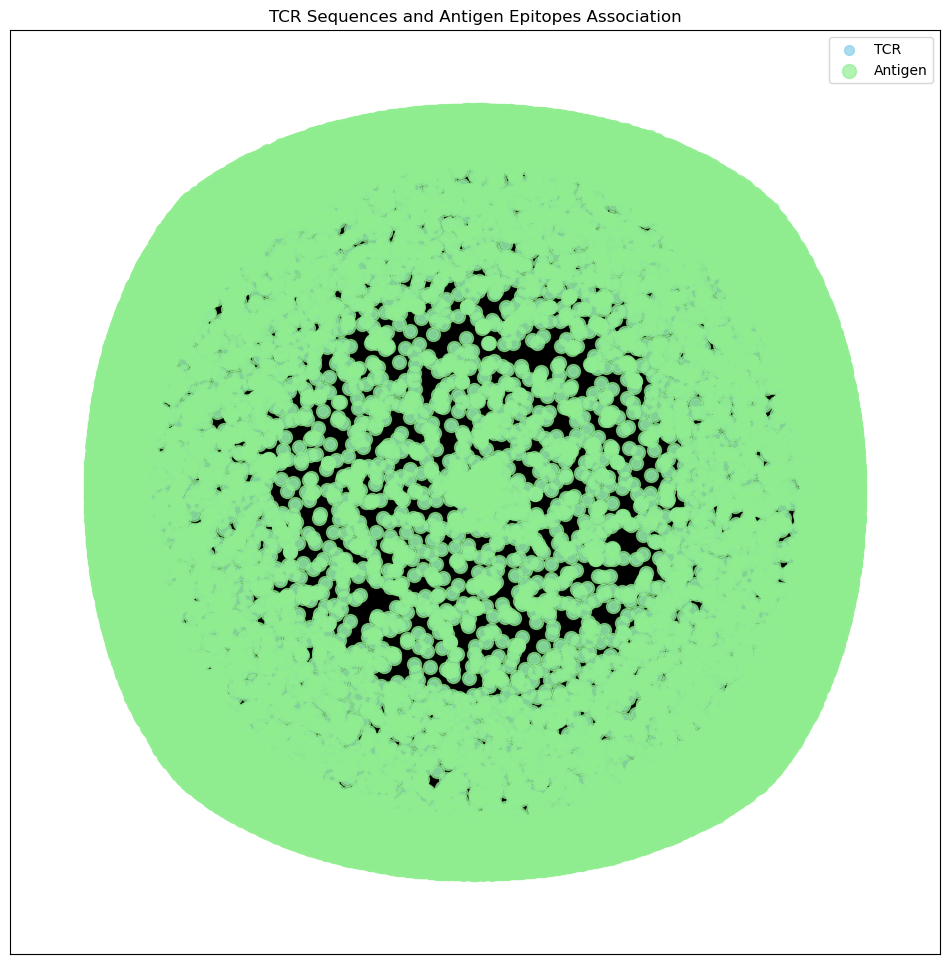

In [7]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges based on TCR sequences and antigen epitopes
for index, row in vdjdb.iterrows():
    G.add_node(row['cdr3'], type='TCR')
    G.add_node(row['antigen.epitope'], type='Antigen')
    G.add_edge(row['cdr3'], row['antigen.epitope'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue', label='TCR', alpha=0.7)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightgreen', label='Antigen', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('TCR Sequences and Antigen Epitopes Association')
plt.legend()
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample graph creation
G = nx.Graph()
G.add_edge('Node1', 'Node2')
G.add_edge('Node2', 'Node3')
G.add_edge('Node3', 'Node1')

# Drawing the graph
plt.figure(figsize=(8, 8))  # Set a figure size if necessary
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Sample Network Graph')
plt.show()

In [ ]:
relationship between cdr3, epitopes and vdj 